# Projet 4 - Segmentez des clients d'un site e-commerce

## Analyse exploratoire et création d'un dataset clean

Le but de ce notebook est d'analyser le jeu de données initial et de le traiter afin de produire un dataset "clean", exporté en csv, qui sera la base du travail de machine learning consécutif.

### Table des matières
1. [Importation et préparation des données](#1-importation-et-préparation-des-données)
2. [Analyse des données manquantes](#2-analyse-des-données-manquantes)
3. [Analyse des variables numériques](#3-analyse-des-variables-numériques)
4. [Analyse des variables catégorielles](#4-analyse-des-variables-catégorielles)
5. [Analyse des corrélations](#5-analyse-des-corrélations)
6. [Conclusion et prochaines étapes](#6-conclusion-et-prochaines-étapes)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

# Pour une meilleure lisibilité des graphiques
plt.style.use('ggplot')  # Utilisation d'un style valide de matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14

# Configuration de seaborn pour une meilleure esthétique
sns.set_theme(style="whitegrid")

## 1. Importation et préparation des données

In [57]:
# Importation du jeu de données
df = pd.read_csv('data/customer_segments3_202409201627.csv')
print(f"Le jeu initial de données contient {df.shape[0]} observations réparties en {df.shape[1]} colonnes/variables.")
df.info()

Le jeu initial de données contient 97078 observations réparties en 13 colonnes/variables.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97078 entries, 0 to 97077
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         97078 non-null  object 
 1   total_orders               97078 non-null  int64  
 2   avg_delivery_time_days     94892 non-null  float64
 3   last_order_date            97078 non-null  object 
 4   days_since_last_order      97078 non-null  float64
 5   total_spent                97078 non-null  float64
 6   avg_review_score           96353 non-null  float64
 7   avg_delivery_delay_days    97078 non-null  float64
 8   max_delivery_delay_days    97078 non-null  float64
 9   last_order_status          97078 non-null  object 
 10  has_comment                97078 non-null  int64  
 11  last_payment_type          97077 non-null  object 
 12  last_payment

## 2. Analyse des données manquantes

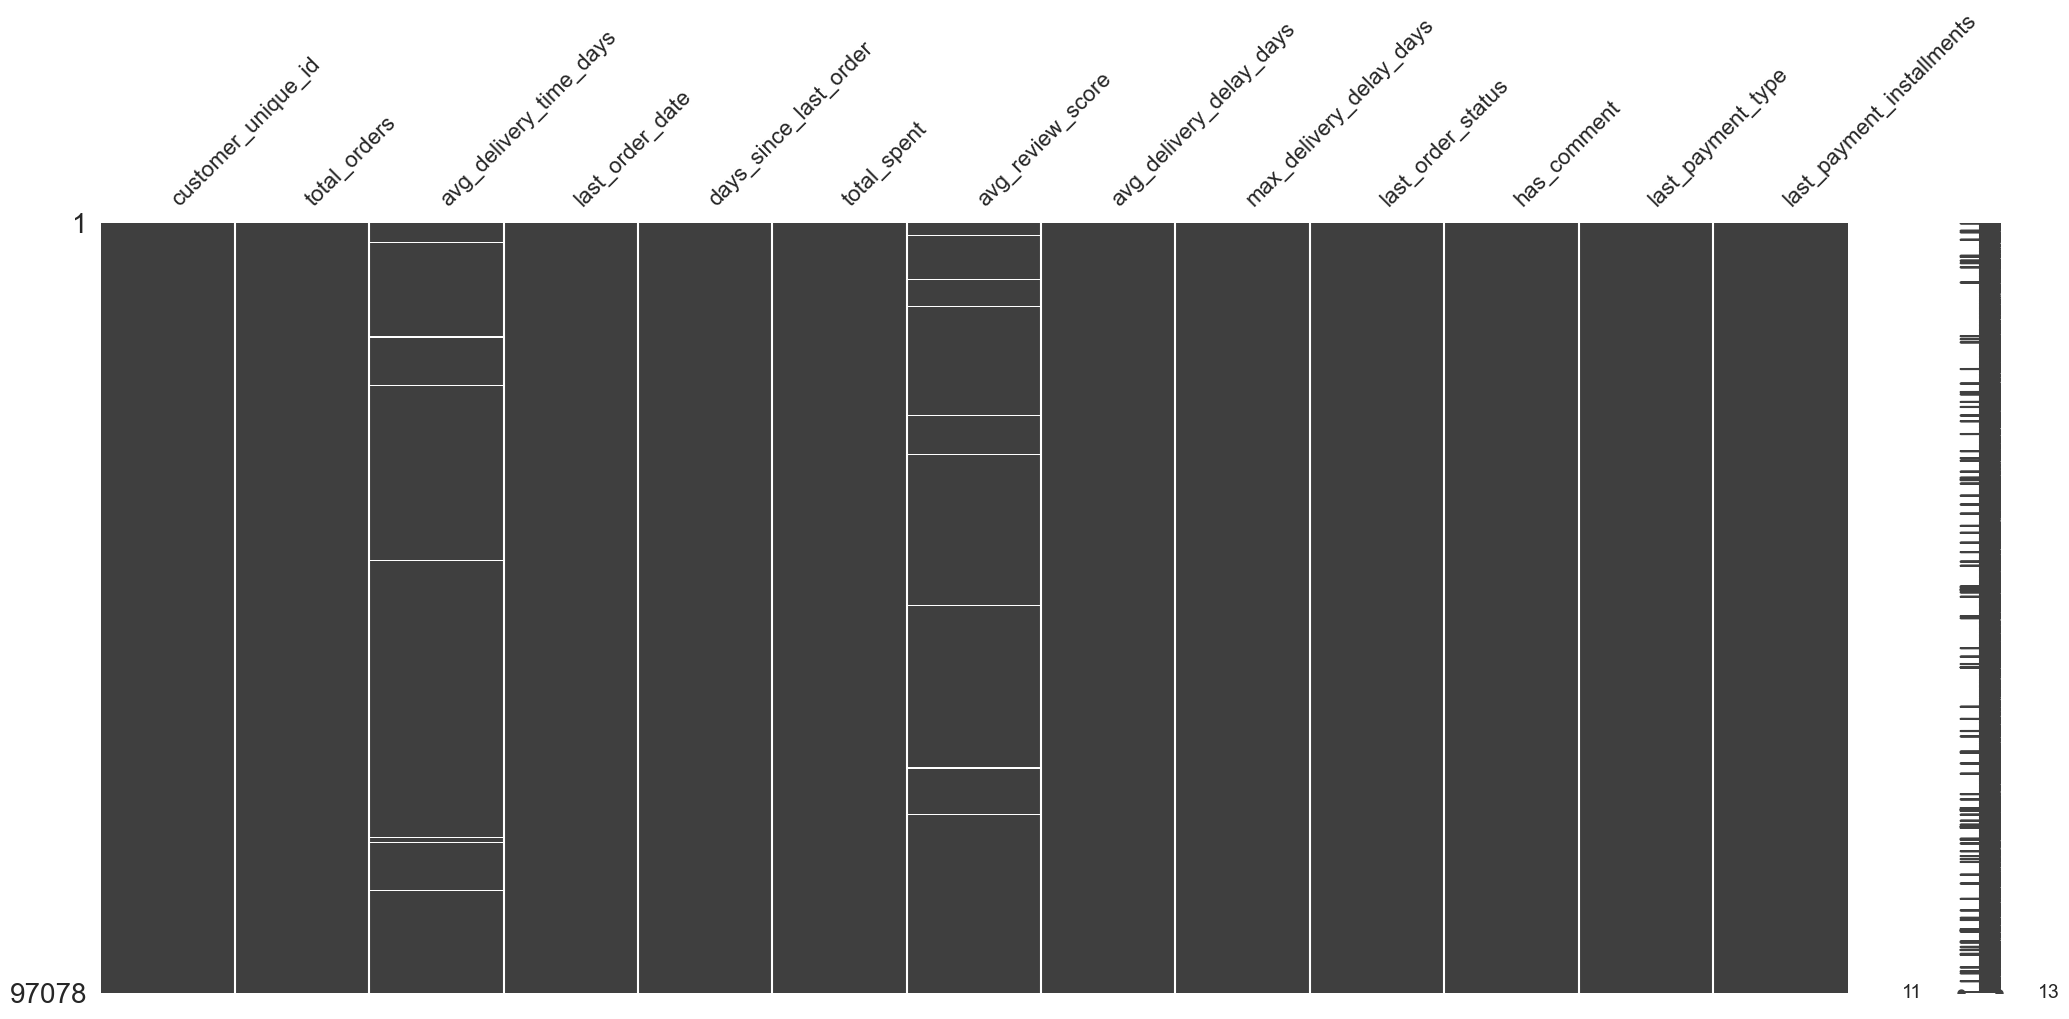

In [58]:
DataAnalysis.show_columns_population(df, 'matrix')

In [59]:
# On supprime la colonne "last_order_date" car elle ne nous sera pas utile, nous avons déjà la colonne "days_since_last_order"
df = df.drop(columns=['last_order_date'])

# On supprime les observations avec des valeurs manquantes
df = df.dropna()
print(f"Après suppression des valeurs manquantes, nous avons {df.shape[0]} observations utilisables.")

Après suppression des valeurs manquantes, nous avons 94269 observations utilisables.


## 3. Analyse des variables numériques

In [60]:
# Sélection des colonnes numériques
numeric_columns = df.select_dtypes(include=['number']).columns
print("Colonnes numériques :")
print(numeric_columns)

# Statistiques descriptives
df[numeric_columns].describe()

Colonnes numériques :
Index(['total_orders', 'avg_delivery_time_days', 'days_since_last_order',
       'total_spent', 'avg_review_score', 'avg_delivery_delay_days',
       'max_delivery_delay_days', 'has_comment', 'last_payment_installments'],
      dtype='object')


,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_installments
count,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000
mean,1.016739,12.519144,287.770761,162.969419,4.155474,0.757350,0.765609,0.408119,2.928248
std,0.142699,9.462724,152.802708,223.318382,1.282087,4.673798,4.695404,0.491488,2.708299
min,1.000000,0.533414,49.145613,9.590000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.765856,163.737350,62.540000,4.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,10.210301,268.780012,106.720000,5.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,15.671852,397.218368,179.340000,5.000000,0.000000,0.000000,1.000000,4.000000
max,11.000000,208.351759,744.364907,13664.080000,5.000000,188.975081,188.975081,1.000000,24.000000


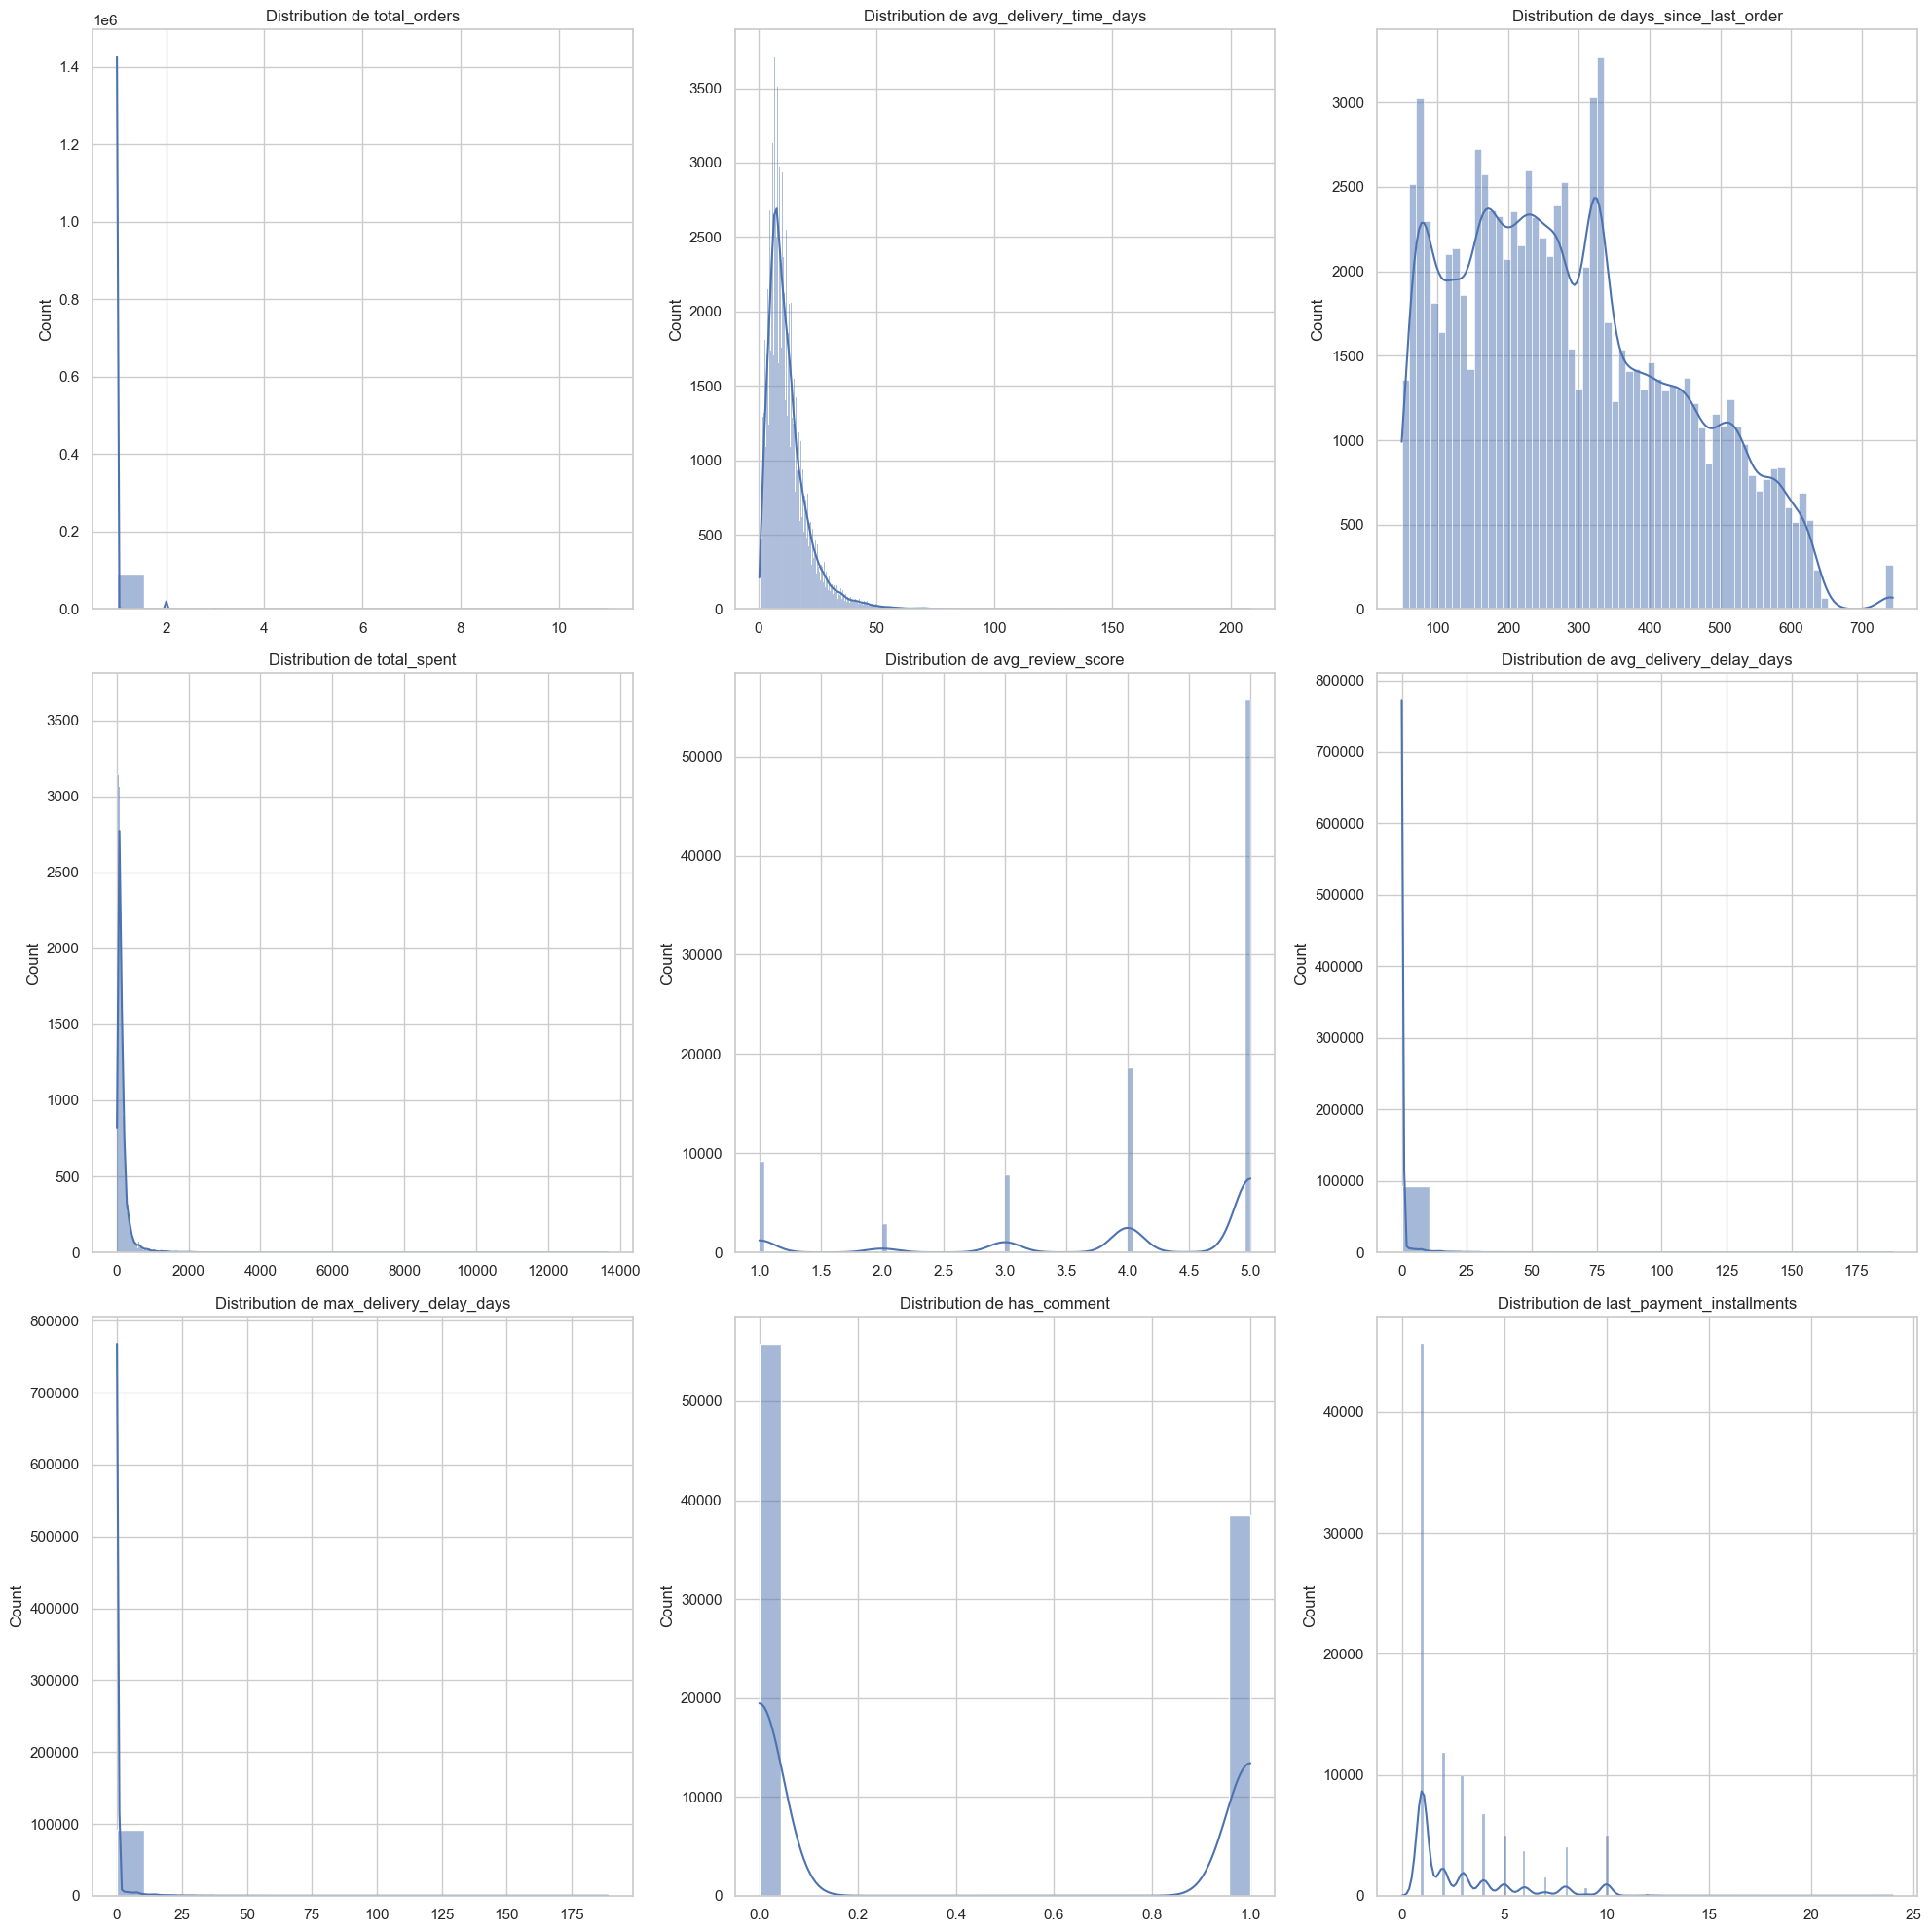

In [61]:
# Distribution des variables numériques
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].set_xlabel('')

plt.tight_layout()
plt.show()

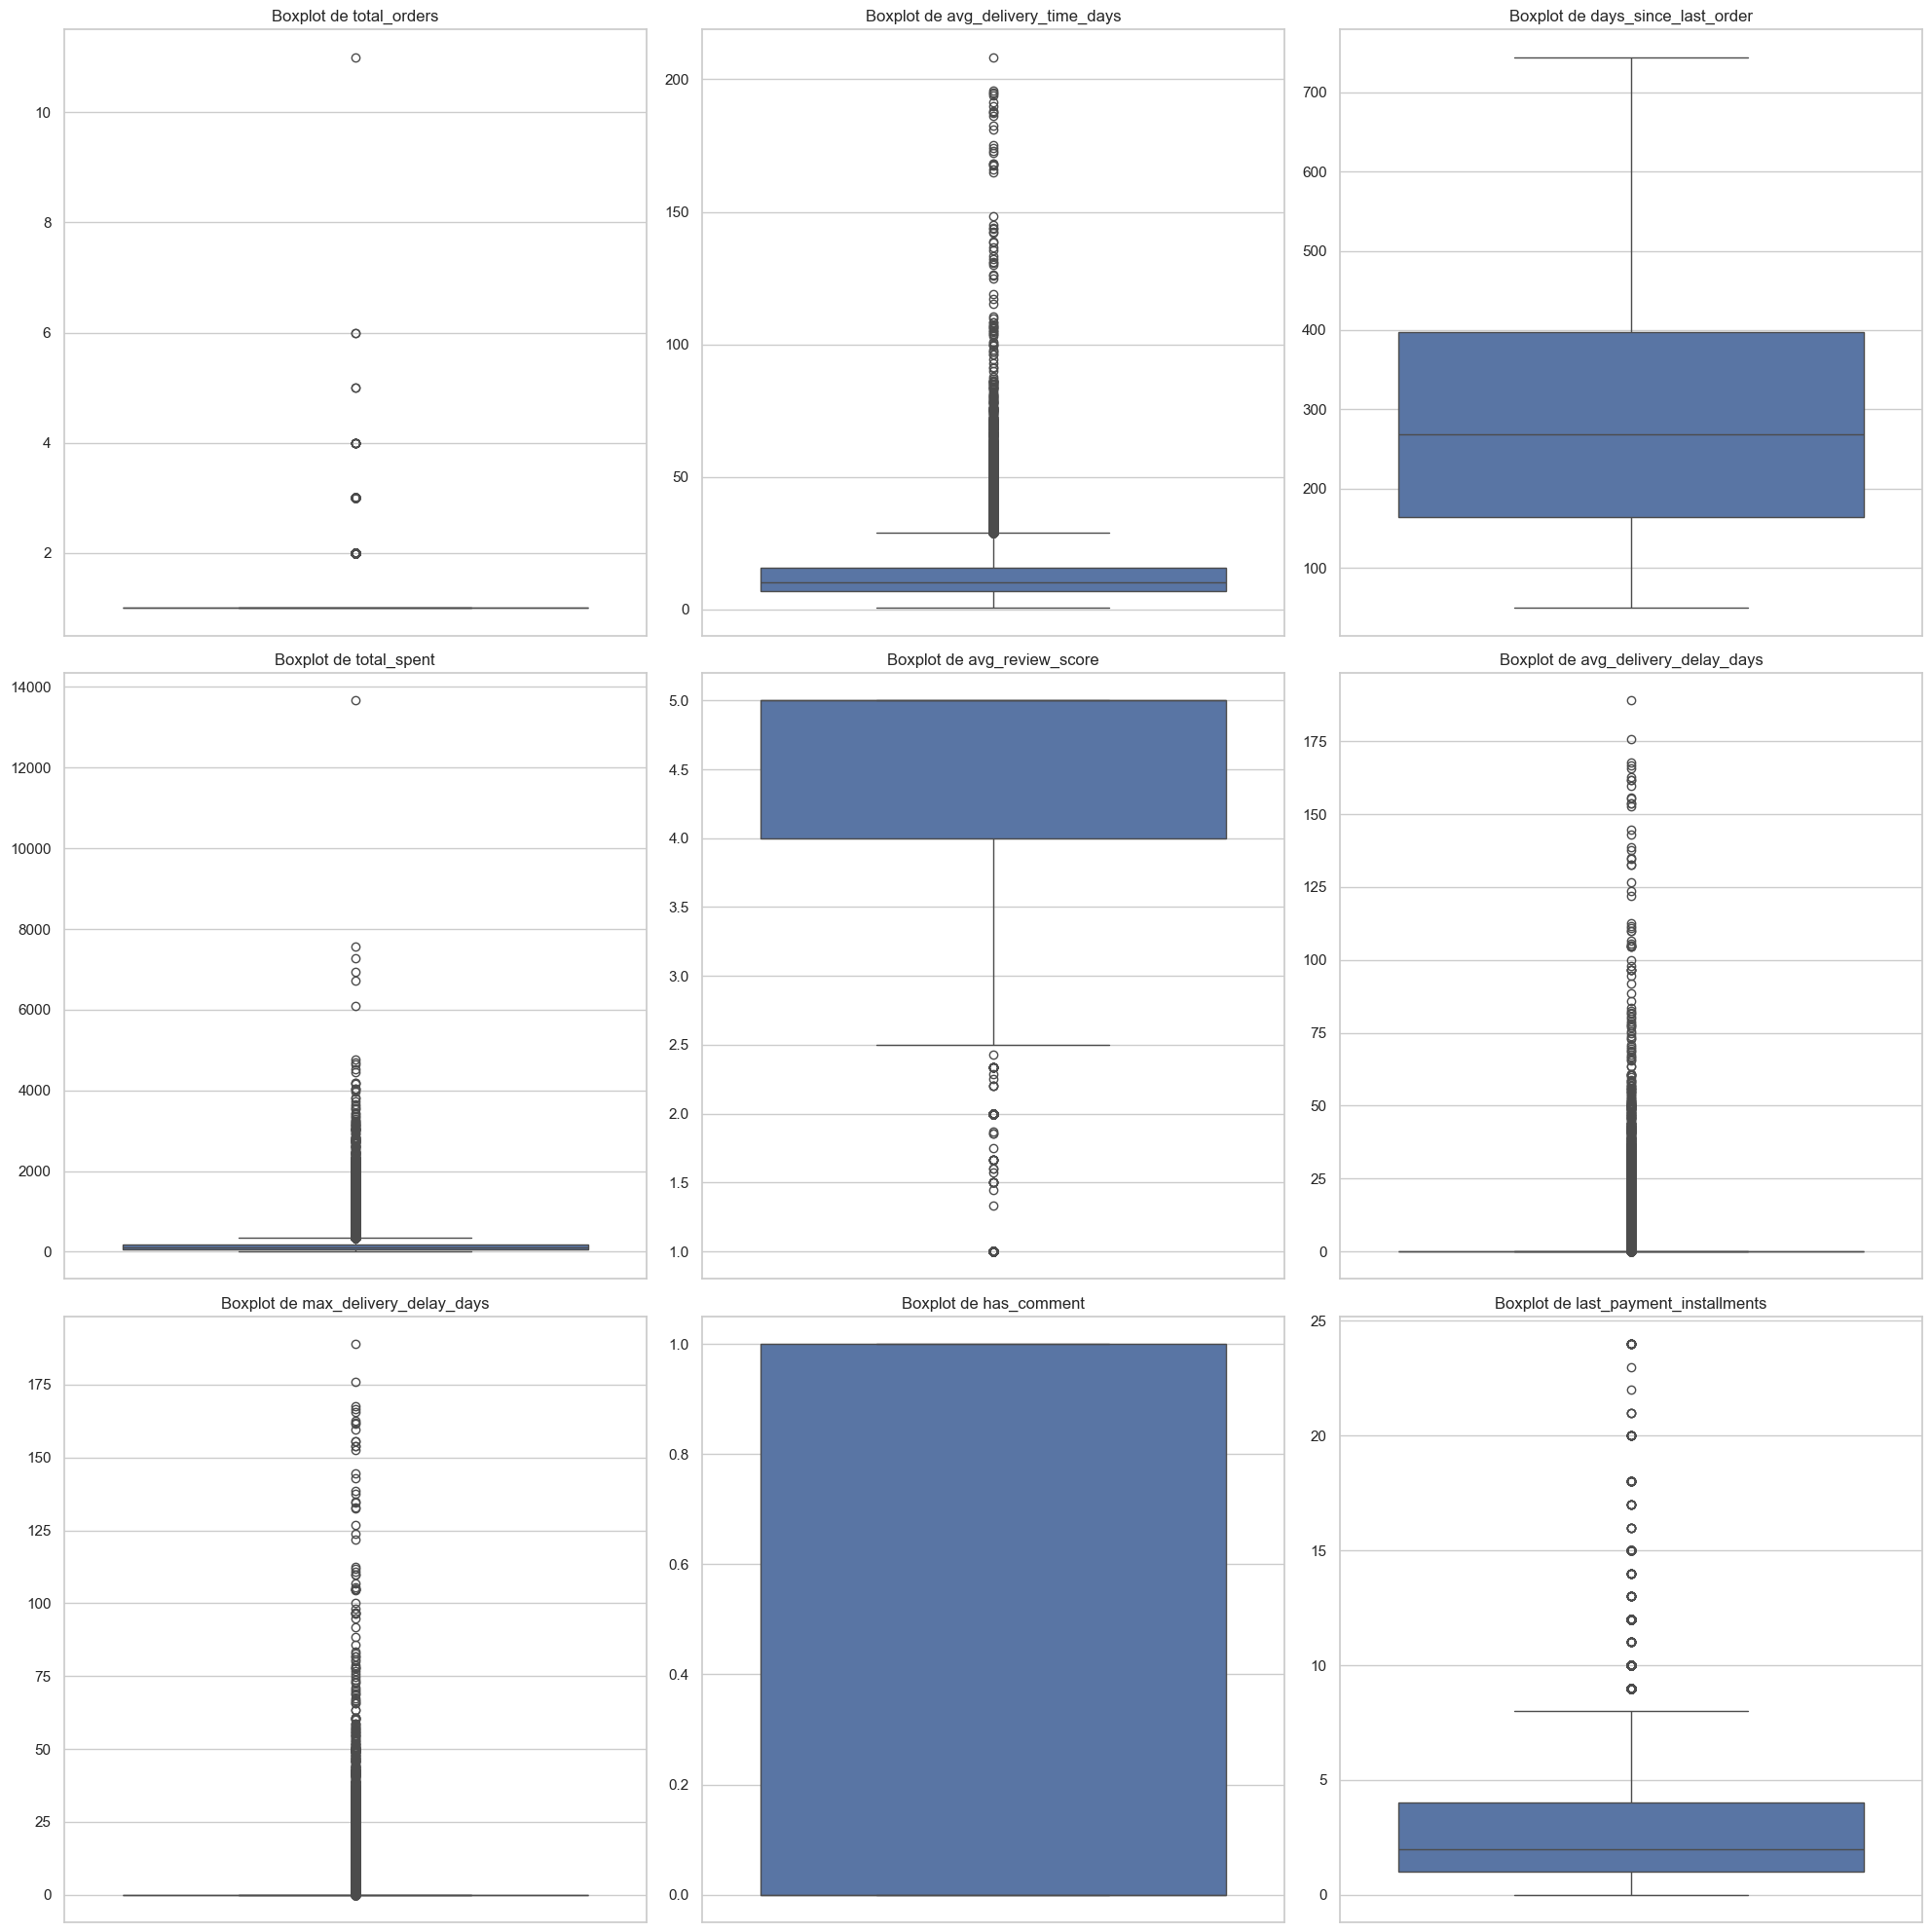

In [62]:
# Boxplots pour détecter les outliers
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {col}')
    axes[idx].set_ylabel('')

plt.tight_layout()
plt.show()

In [63]:
# Les colonnes max_delivery_delay_days et avg_delivery_delay_days contiennent des valeurs identiques. Nous le vérifions, et si c'est le cas, supprimons une des colonnes.
print("Les colonnes max_delivery_delay_days et avg_delivery_delay_days contiennent-elles les mêmes valeurs ?")
sameValues = (df['max_delivery_delay_days'] == df['avg_delivery_delay_days']).all()

# quelles sont les valeurs différentes entre les deux colonnes ?
if not sameValues:
    print("Les colonnes max_delivery_delay_days et avg_delivery_delay_days ne contiennent pas les mêmes valeurs.")
    print("Valeurs différentes entre les deux colonnes :")
    print(df.loc[df['max_delivery_delay_days'] != df['avg_delivery_delay_days'], ['max_delivery_delay_days', 'avg_delivery_delay_days']])

# Suppression de la colonne avg_delivery_delay_days
if sameValues:
    print("Les colonnes max_delivery_delay_days et avg_delivery_delay_days contiennent les mêmes valeurs. Nous allons supprimer la colonne avg_delivery delay_days.")
    df = df.drop(columns=['avg_delivery_delay_days'])

Les colonnes max_delivery_delay_days et avg_delivery_delay_days contiennent-elles les mêmes valeurs ?
Les colonnes max_delivery_delay_days et avg_delivery_delay_days ne contiennent pas les mêmes valeurs.
Valeurs différentes entre les deux colonnes :
       max_delivery_delay_days  avg_delivery_delay_days
789                   8.770868                 4.385434
2123                  5.743773                 2.871887
2922                 12.769340                 6.384670
3060                  0.798565                 0.199641
3738                  0.928843                 0.309614
...                        ...                      ...
95335                10.809549                 3.603183
95926                 1.860162                 0.930081
96138                 4.624884                 0.924977
96402                 4.824942                 2.412471
96917                 4.899155                 1.633052

[188 rows x 2 columns]


In [64]:
# Il n'y a que 188 cas où la valeur est différente. Nous supprimons la colonne avg_delivery_delay_days.
df = df.drop(columns=['avg_delivery_delay_days'])

# on enlève avg_delivery_delay_days de numeric_columns
numeric_columns = numeric_columns.drop('avg_delivery_delay_days')

### Analyse des outliers

Nous pouvons observer que certaines variables comme 'total_orders', 'total_spent', et 'max_delivery_delay_days' présentent des valeurs extrêmes. Ces outliers peuvent être légitimes dans le contexte d'un site e-commerce (par exemple, des clients très fidèles ou des commandes très importantes), mais il faudra les prendre en compte lors de la modélisation.

## 4. Analyse des variables catégorielles

In [65]:
# Sélection des colonnes catégorielles
categorical_columns = df.select_dtypes(exclude=['number']).columns
print("Colonnes catégorielles :")
print(categorical_columns)

# Affichage des valeurs uniques pour chaque variable catégorielle
for col in categorical_columns:
    # Seulement si ce n'est pas customer_unique_id
    if col == 'customer_unique_id':
        continue
    print(f"\nValeurs uniques dans {col}:")
    print(df[col].value_counts())

Colonnes catégorielles :
Index(['customer_unique_id', 'last_order_status', 'last_payment_type'], dtype='object')

Valeurs uniques dans last_order_status:
last_order_status
delivered    94263
canceled         6
Name: count, dtype: int64

Valeurs uniques dans last_payment_type:
last_payment_type
credit_card    72773
boleto         18595
debit_card      1462
voucher         1439
Name: count, dtype: int64


In [66]:
# La colonne "last_order_status" ne contient qu'une seule valeur à l'exception de 6 individus, on la supprime
df = df.drop(columns=['last_order_status'])

In [67]:
# La colonne "last_payment_type" contient une majorité de "credit_card". Nous allons utiliser 2 valeurs pour cette colonne, credit_card et other
df['last_payment_type'] = df['last_payment_type'].apply(lambda x: 'credit_card' if x == 'credit_card' else 'other')

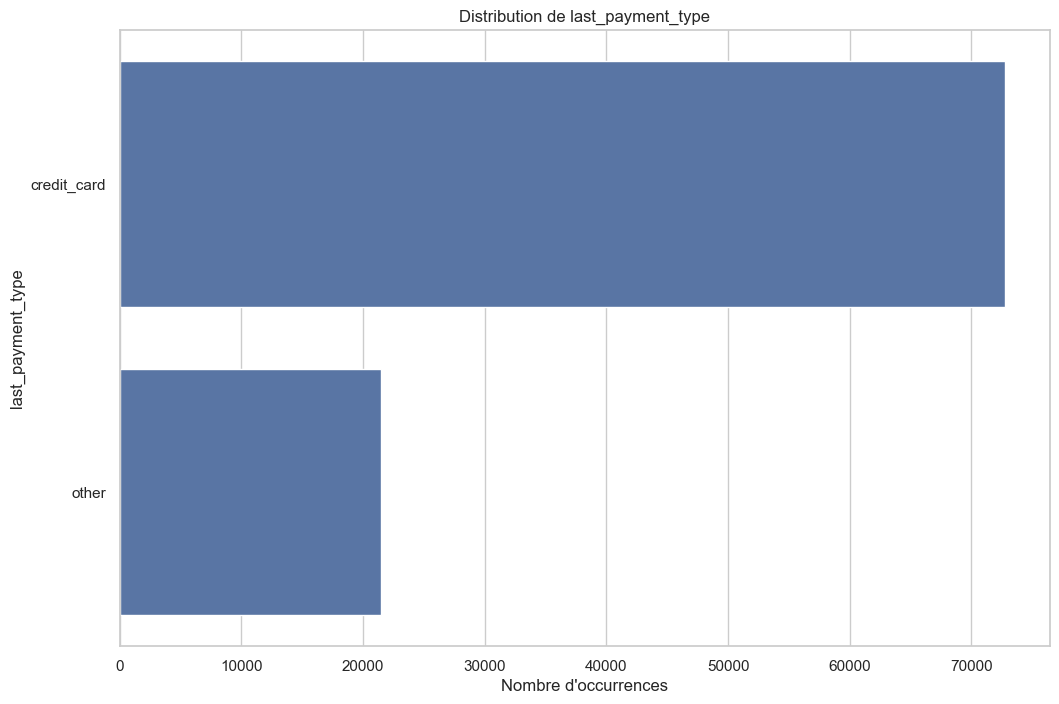

In [68]:
# Colonnes catégorielles sans customer_unique_id
categorical_columns = categorical_columns.drop(['customer_unique_id', 'last_order_status'])

# # Visualisation de la distribution de la variable catégorielle "last_payment_type"
sns.countplot(y=df['last_payment_type'])
plt.title('Distribution de last_payment_type')
plt.xlabel('Nombre d\'occurrences')
plt.show()


# fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 6*len(categorical_columns)))

# for idx, col in enumerate(categorical_columns):
#     sns.countplot(y=df[col], ax=axes[idx])
#     axes[idx].set_title(f'Distribution de {col}')
#     axes[idx].set_xlabel('Nombre d\'occurrences')

# plt.tight_layout()
# plt.show()

## 5. Analyse des corrélations

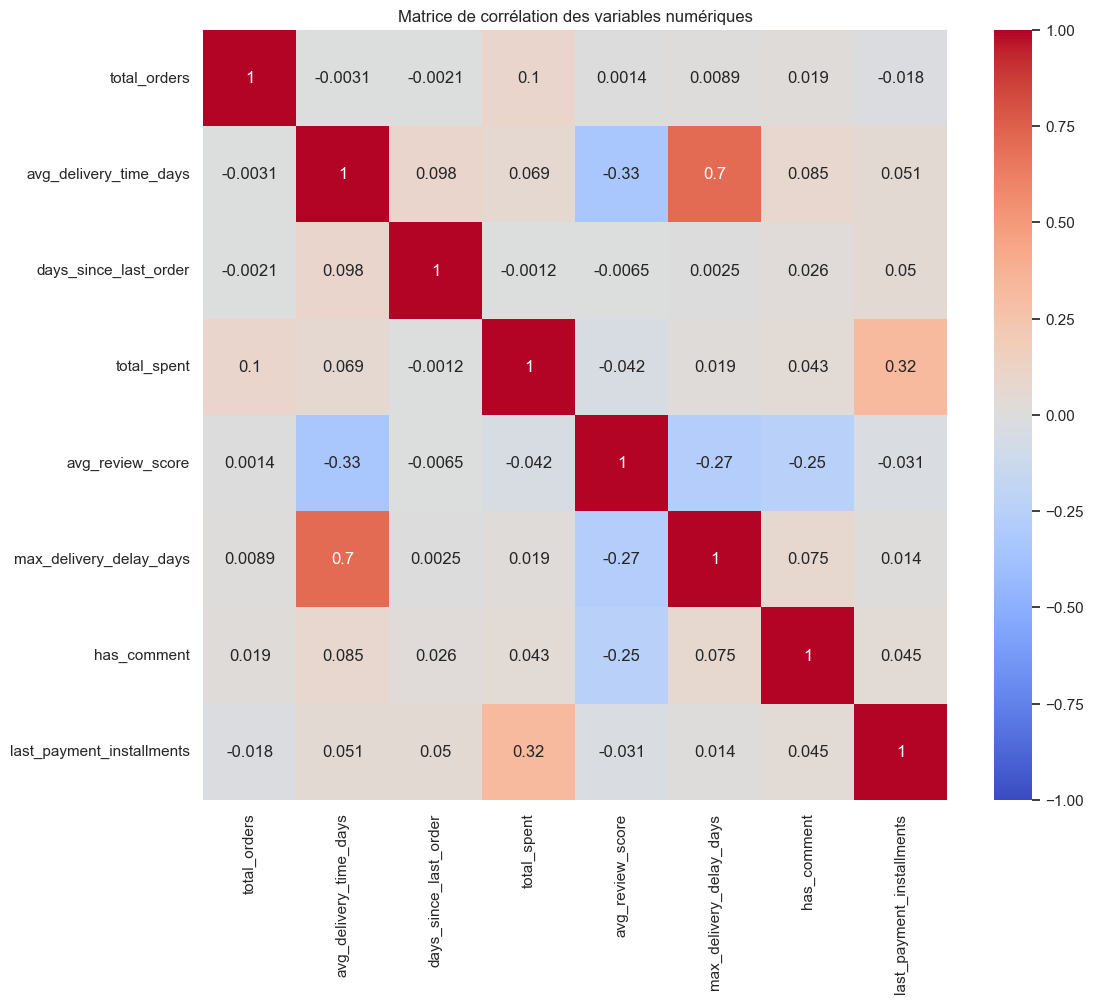

La matrice de corrélation a été sauvegardée dans 'data/correlation_matrix.csv'


In [69]:
# Calcul de la matrice de corrélation
correlation_matrix = df[numeric_columns].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

# Sauvegarde de la matrice de corrélation
correlation_matrix.to_csv('data/correlation_matrix.csv')
print("La matrice de corrélation a été sauvegardée dans 'data/correlation_matrix.csv'")

In [70]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments
61636,a266970c5e6f44269b106604202c97bb,1,15.212431,366.265660,187.53,5.0,0.000000,0,credit_card,2.0
38244,6497ed50b6c370d8ac59bfc3ddb0775d,1,9.013681,86.918843,127.86,5.0,0.000000,1,credit_card,6.0
6278,106e0497270dd197f3911ddfd9251552,1,8.956447,559.336840,60.46,5.0,0.000000,1,credit_card,2.0
47983,7e2cbfaa3c4cba104bc67afb721d62ec,1,16.315486,368.404005,31.75,5.0,0.000000,1,credit_card,1.0
31707,5376bd8df26ab646ce3e4c874bc693b9,1,42.339676,386.191262,20.68,1.0,25.919456,1,other,1.0
8049,14f64911f31f3722899596d1095a233e,1,7.136817,58.163507,353.08,1.0,0.000000,1,credit_card,10.0
61136,a112679f7d5389c219d7a51b60f12f18,1,19.119352,362.992847,111.02,5.0,0.000000,0,credit_card,6.0
61161,a126181f98c5f1ec6e3d8740f47832d6,1,29.821470,221.048819,179.04,3.0,4.543692,1,credit_card,4.0
73652,c1dc1162de49817a25314db3030276f5,1,22.319144,153.080197,69.90,5.0,0.000000,0,other,1.0
6839,11e81b9497f68f501ac372f3cc827bbb,1,11.926470,181.858241,232.07,5.0,0.000000,0,credit_card,10.0


### Analyse des corrélations

On peut observer quelques corrélations intéressantes :
1. Une forte corrélation positive entre 'total_orders' et 'total_spent', ce qui est logique.
2. Une corrélation modérée entre 'avg_delivery_time_days' et 'avg_delivery_delay_days', ce qui suggère que les retards de livraison contribuent significativement au temps de livraison total.
3. Une faible corrélation négative entre 'avg_review_score' et 'avg_delivery_delay_days', indiquant que les retards de livraison peuvent légèrement impacter la satisfaction client.

Ces corrélations seront importantes à considérer lors de la phase de modélisation pour éviter la multicolinéarité et pour choisir les variables les plus pertinentes pour la segmentation.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94269 entries, 0 to 97077
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         94269 non-null  object 
 1   total_orders               94269 non-null  int64  
 2   avg_delivery_time_days     94269 non-null  float64
 3   days_since_last_order      94269 non-null  float64
 4   total_spent                94269 non-null  float64
 5   avg_review_score           94269 non-null  float64
 6   max_delivery_delay_days    94269 non-null  float64
 7   has_comment                94269 non-null  int64  
 8   last_payment_type          94269 non-null  object 
 9   last_payment_installments  94269 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 7.9+ MB


## 6. Conclusion et prochaines étapes

### Résumé de l'analyse exploratoire

1. Nous avons un jeu de données de 97078 clients avec 12 variables après nettoyage.
2. Les variables numériques présentent des distributions variées, certaines avec des outliers significatifs.
3. Les variables catégorielles sont principalement des identifiants uniques, à l'exception de 'customer_state' qui pourrait être utile pour la segmentation géographique.
4. Il existe des corrélations intéressantes entre certaines variables, notamment entre le nombre de commandes et le montant total dépensé.

### Prochaines étapes

1. Feature engineering : créer de nouvelles variables pertinentes, par exemple :
   - Ratio de dépense moyenne par commande
   - Fréquence d'achat (nombre de jours moyen entre les commandes)
   - Score de fidélité combinant plusieurs métriques
2. Normalisation des données : utiliser des techniques comme StandardScaler ou MinMaxScaler pour préparer les données à la modélisation.
3. Réduction de dimensionnalité : appliquer PCA ou t-SNE pour visualiser les données en 2D ou 3D et potentiellement réduire le nombre de variables.
4. Sélection de variables : choisir les variables les plus pertinentes pour la segmentation en évitant la multicolinéarité.
5. Modélisation : appliquer des algorithmes de clustering comme K-means, DBSCAN ou des méthodes hiérarchiques.
6. Évaluation et interprétation des clusters : analyser les caractéristiques de chaque segment de clients identifié.

Ces étapes nous permettront de créer une segmentation client efficace et exploitable pour le site e-commerce.

In [72]:
# Génération du fichier csv clean pour les modèles de machine learning
df.to_csv('data/clean.csv', index=False)
print("Le dataset nettoyé a été sauvegardé dans 'data/clean.csv'")

# Affichage d'un échantillon du dataset final
df.sample(10)

Le dataset nettoyé a été sauvegardé dans 'data/clean.csv'


,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments
61516,a21dab9a023e31db25a426c6787b65ff,1,7.311400,279.212141,61.05,5.0,0.000000,0,credit_card,1.0
20422,35aabace9e8c8f00fad6099760de33e0,1,13.087639,200.927558,92.45,1.0,0.000000,1,credit_card,3.0
41656,6d9284ebe2826c96d9be5d939fd7b1b2,1,40.971019,234.885417,43.00,1.0,18.856644,1,other,1.0
15954,2a117e51457d1bf9070aad3c0effa03e,1,8.892674,139.815880,77.99,5.0,0.000000,0,credit_card,1.0
59502,9cb1abc10e2f73a0296bc7eaf48e4712,1,3.090891,85.112801,197.58,1.0,0.000000,1,other,1.0
36639,6041143fd50e4235e799bef24061ae8e,1,14.858218,133.819109,40.69,4.0,0.000000,0,other,1.0
39182,6705554fcc2578a2b76b6b1b65df2a75,1,5.310116,437.283981,164.06,1.0,0.000000,1,credit_card,2.0
75260,c64f0751d9163317080fb55992862366,1,11.960301,314.987211,60.85,5.0,0.000000,0,other,1.0
67605,b1e49ddfb3b6bc54e8d43e8f5592abf1,1,20.463484,252.797558,154.18,1.0,0.000000,1,credit_card,3.0
50299,8459ee508c1b6da0559bc181ba1554c2,1,32.950509,376.861250,77.57,5.0,0.860301,1,credit_card,1.0
